<a href="https://colab.research.google.com/github/Abhinavk910/Classification/blob/master/Mobile%20Price%20Range%20Prediction%20Using%20NN/Mobile_Price_Range_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()
! pip install -q kaggle
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [0]:
! kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 50.6MB/s]


In [0]:
!unzip -q 'mobile-price-classification.zip'

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [0]:
data = pd.read_csv('train.csv')
data.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2


In [0]:
data.shape

(2000, 21)

In [0]:

# battery_power - Total energy a battery can store in one time measured in mAh
# blue - Has bluetooth or not
# clock_speed - speed at which microprocessor executes instructions
# dual_sim - Has dual sim support or not
# fc - Front Camera mega pixels
# four_g - Has 4G or not
# int_memory - Internal Memory in Gigabytes
# m_dep - Mobile Depth in cm
# mobile_wt - Weight of mobile phone
# n_cores - Number of cores of processor
# pc - Primary Camera mega pixels
# px_height - Pixel Resolution Height
# px_width - Pixel Resolution Width
# ram - Random Access Memory in Megabytes
# sc_h - Screen Height of mobile in cm
# sc_w - Screen Width of mobile in cm
# talk_time - longest time that a single battery charge will last when you are
# three_g - Has 3G or not
# touch_screen - Has touch screen or not
# wifi - Has wifi or not


# Data Exploration

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
dtypes: float64(2), int64(18)
memory usage: 312.6 KB


In [0]:
data.isnull().sum()[data.isnull().sum() != 0]

Series([], dtype: int64)

In [0]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Data Visualization

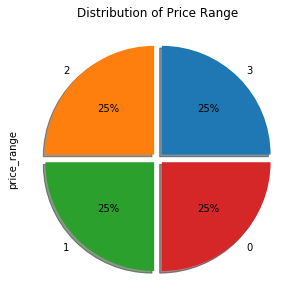

In [0]:
g = data.price_range.value_counts().plot(kind = 'pie', explode = [0.05,0.05,0.05,0.05], shadow = True, autopct = '%1.0f%%', figsize = (10,5),
                                    title = 'Distribution of Price Range' )

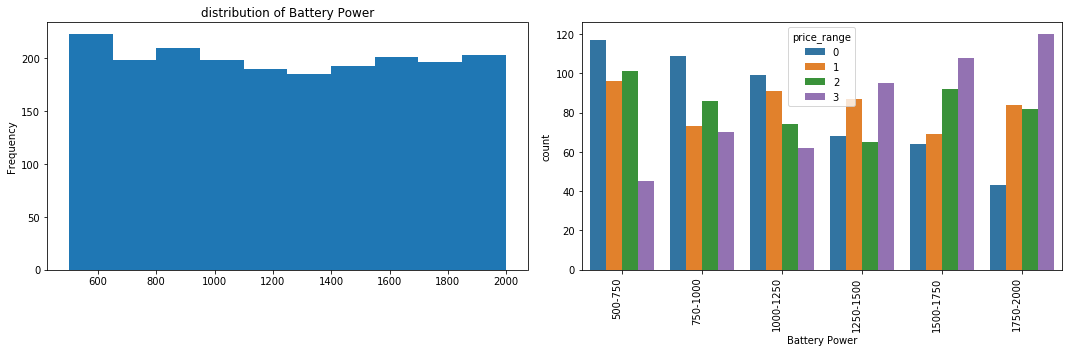

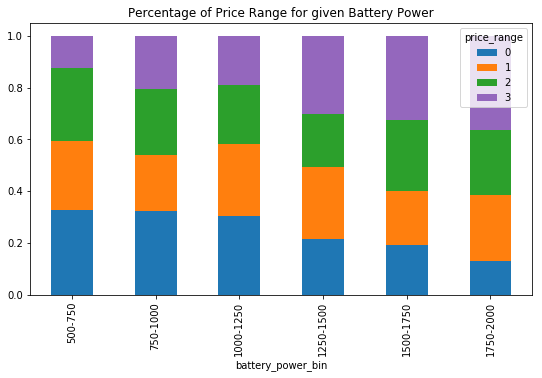

In [0]:
lable = 'battery_power'
dist_title = 'distribution of Battery Power'
X = str(lable+'_bin')
hue = 'price_range'
xlabel = 'Battery Power'
crosstab_title = 'Percentage of Price Range for given Battery Power'

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
data[lable].plot('hist', title = dist_title)

bins = [500,750,1000,1250,1500,1750,2000]
labels = ['500-750','750-1000','1000-1250','1250-1500','1500-1750','1750-2000']
data[X] = pd.cut(data[lable], bins=bins, labels=labels)


plt.subplot(1,2,2)
sns.countplot(x = X, hue = hue, data = data,palette=["C0", "C1", "C2", "C4"])
plt.xlabel(xlabel)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
pd.crosstab(data[X],data[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5),color=["C0", "C1", "C2", "C4"],
                                                     title = crosstab_title)
plt.show()

As Battery power inc price range aslso increases. This will contribute highly on prediction.

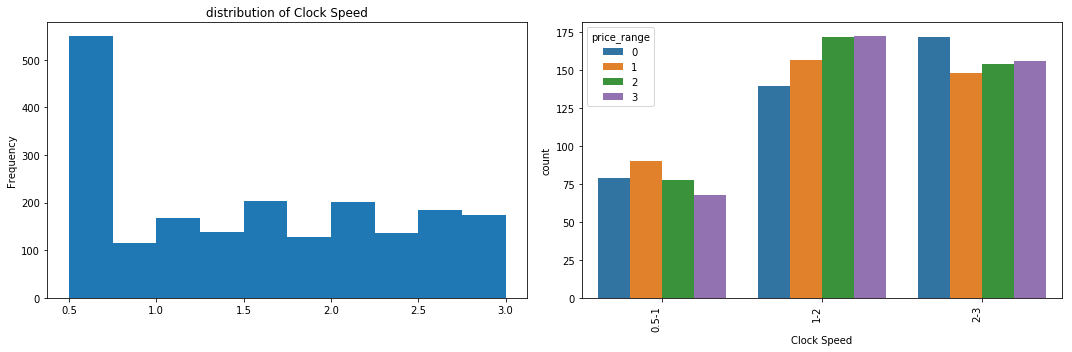

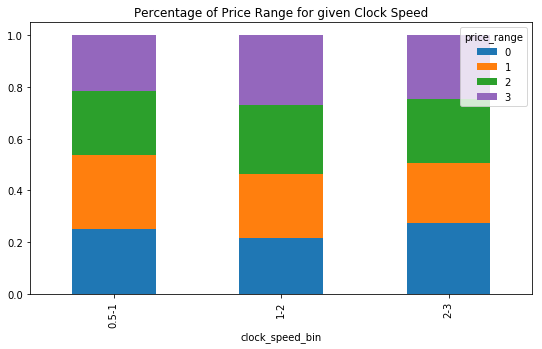

In [0]:
lable = 'clock_speed'
dist_title = 'distribution of Clock Speed'
X = str(lable+'_bin')
hue = 'price_range'
xlabel = 'Clock Speed'
crosstab_title = 'Percentage of Price Range for given Clock Speed'

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
data[lable].plot('hist', title = dist_title)

bins = [0.500, 1.000,2.0,3.00]
labels = ['0.5-1','1-2','2-3']
data[X] = pd.cut(data[lable], bins=bins, labels=labels)


plt.subplot(1,2,2)
sns.countplot(x = X, hue = hue, data = data,palette=["C0", "C1", "C2", "C4"])
plt.xlabel(xlabel)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
pd.crosstab(data[X],data[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5),color=["C0", "C1", "C2", "C4"],
                                                     title = crosstab_title)
plt.show()

this will be least valuable in predicting

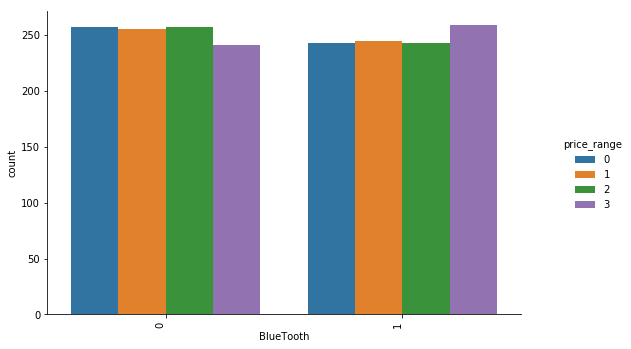

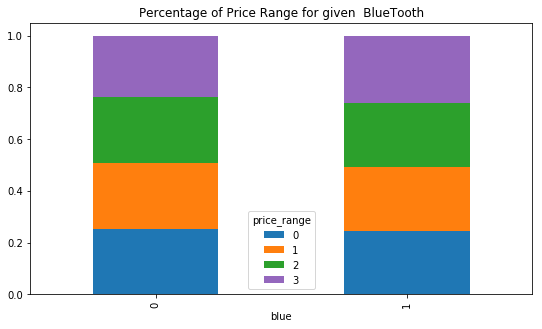

In [0]:
lable = 'blue'
dist_title = 'distribution of BlueTooth'
X = str(lable+'_bin')
hue = 'price_range'
xlabel = 'BlueTooth'
crosstab_title = 'Percentage of Price Range for given  BlueTooth'


g = sns.catplot(x = lable, hue = hue, kind = 'count', data = data, palette=["C0", "C1", "C2", "C4"])
g.fig.set_size_inches(9,5)
plt.xlabel(xlabel)
plt.xticks(rotation=90, ha='right')

pd.crosstab(data[lable],data[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5), color=["C0", "C1", "C2", "C4"],
                                                     title = crosstab_title)
plt.show()

BlueTooth will not be valuable in predicting

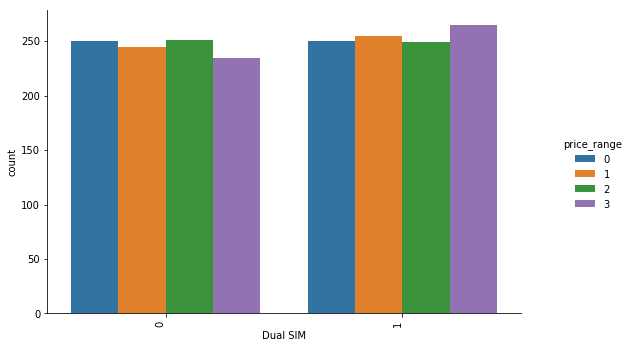

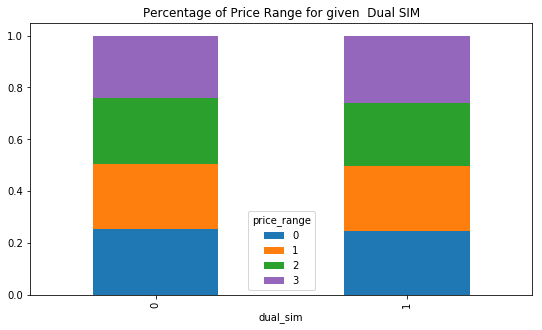

In [0]:
lable = 'dual_sim'
dist_title = 'distribution of Dual Sim'
X = str(lable+'_bin')
hue = 'price_range'
xlabel = 'Dual SIM'
crosstab_title = 'Percentage of Price Range for given  Dual SIM'


g = sns.catplot(x = lable, hue = hue, kind = 'count', data = data, palette=["C0", "C1", "C2", "C4"])
g.fig.set_size_inches(9,5)
plt.xlabel(xlabel)
plt.xticks(rotation=90, ha='right')

pd.crosstab(data[lable],data[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5), color=["C0", "C1", "C2", "C4"],
                                                     title = crosstab_title)
plt.show()

Dual SIM will not be valuable in predicting

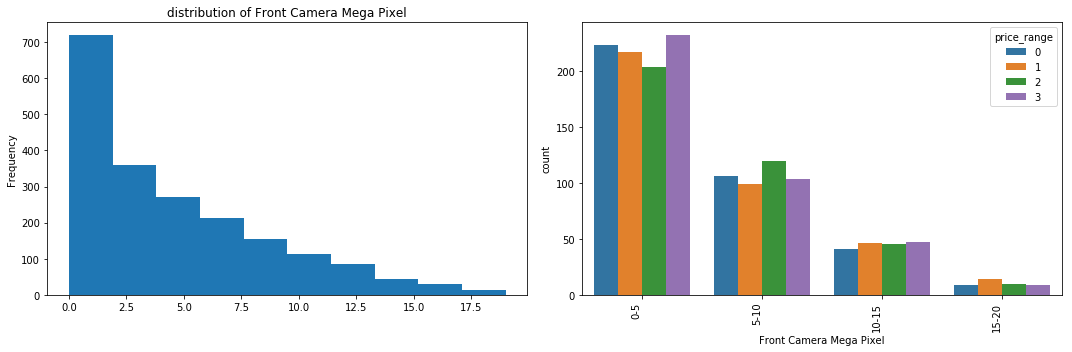

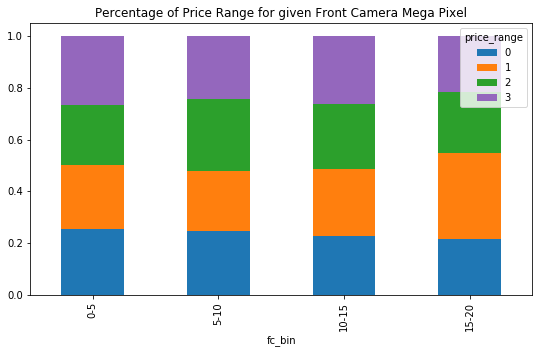

In [0]:
# fc - Front Camera Mega Pixel
lable = 'fc'
dist_title = 'distribution of Front Camera Mega Pixel'
X = str(lable+'_bin')
hue = 'price_range'
xlabel = 'Front Camera Mega Pixel'
crosstab_title = 'Percentage of Price Range for given Front Camera Mega Pixel'

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
data[lable].plot('hist', title = dist_title)

bins = [0, 5, 10, 15, 20]
labels = ['0-5','5-10','10-15','15-20']
data[X] = pd.cut(data[lable], bins=bins, labels=labels)


plt.subplot(1,2,2)
sns.countplot(x = X, hue = hue, data = data,palette=["C0", "C1", "C2", "C4"])
plt.xlabel(xlabel)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
pd.crosstab(data[X],data[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5),color=["C0", "C1", "C2", "C4"],
                                                     title = crosstab_title)
plt.show()

Front Camera Mega Pixel also has low predicting capability

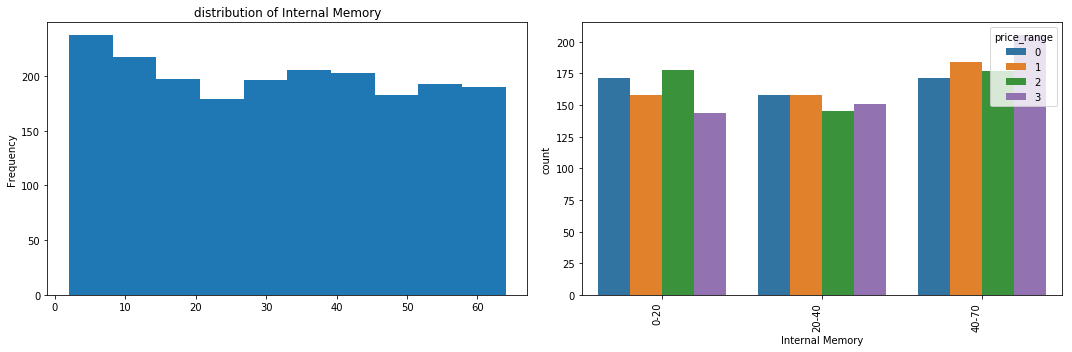

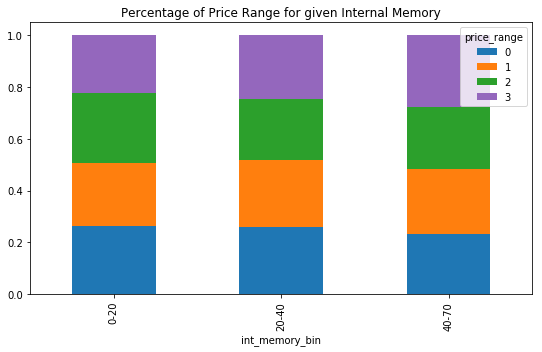

In [0]:
lable = 'int_memory'
dist_title = 'distribution of Internal Memory'
X = str(lable+'_bin')
hue = 'price_range'
xlabel = 'Internal Memory'
crosstab_title = 'Percentage of Price Range for given Internal Memory'

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
data[lable].plot('hist', title = dist_title)

bins = [0, 20, 40, 70]
labels = ['0-20','20-40','40-70']
data[X] = pd.cut(data[lable], bins=bins, labels=labels)


plt.subplot(1,2,2)
sns.countplot(x = X, hue = hue, data = data,palette=["C0", "C1", "C2", "C4"])
plt.xlabel(xlabel)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
pd.crosstab(data[X],data[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5),color=["C0", "C1", "C2", "C4"],
                                                     title = crosstab_title)
plt.show()

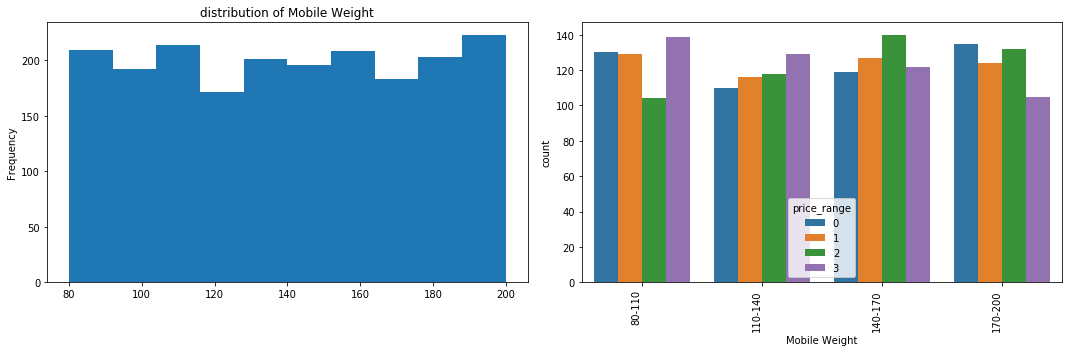

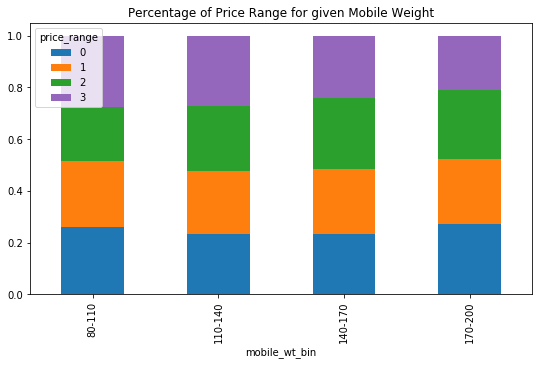

In [0]:
lable = 'mobile_wt'
dist_title = 'distribution of Mobile Weight'
X = str(lable+'_bin')
hue = 'price_range'
xlabel = 'Mobile Weight'
crosstab_title = 'Percentage of Price Range for given Mobile Weight'

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
data[lable].plot('hist', title = dist_title)

bins = [80, 110, 140, 170, 200]
labels = ['80-110','110-140','140-170', '170-200']
data[X] = pd.cut(data[lable], bins=bins, labels=labels)


plt.subplot(1,2,2)
sns.countplot(x = X, hue = hue, data = data,palette=["C0", "C1", "C2", "C4"])
plt.xlabel(xlabel)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
pd.crosstab(data[X],data[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5),color=["C0", "C1", "C2", "C4"],
                                                     title = crosstab_title)
plt.show()

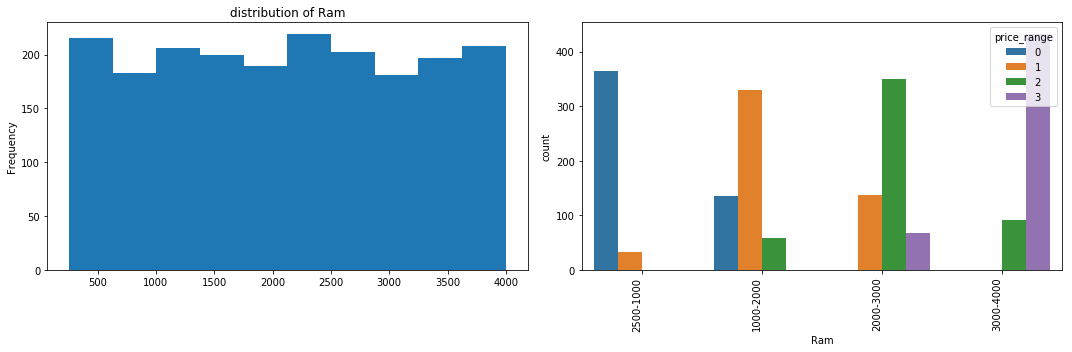

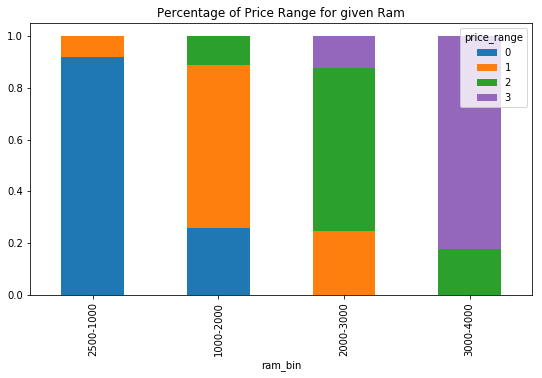

In [0]:
lable = 'ram'
dist_title = 'distribution of Ram'
X = str(lable+'_bin')
hue = 'price_range'
xlabel = 'Ram'
crosstab_title = 'Percentage of Price Range for given Ram'

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
data[lable].plot('hist', title = dist_title)

bins = [250, 1000, 2000, 3000, 4000]
labels = ['2500-1000','1000-2000','2000-3000', '3000-4000']
data[X] = pd.cut(data[lable], bins=bins, labels=labels)


plt.subplot(1,2,2)
sns.countplot(x = X, hue = hue, data = data,palette=["C0", "C1", "C2", "C4"])
plt.xlabel(xlabel)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
pd.crosstab(data[X],data[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5),color=["C0", "C1", "C2", "C4"],
                                                     title = crosstab_title)
plt.show()

Now this is called highly dependent feature. Model surelly highly depend on it.

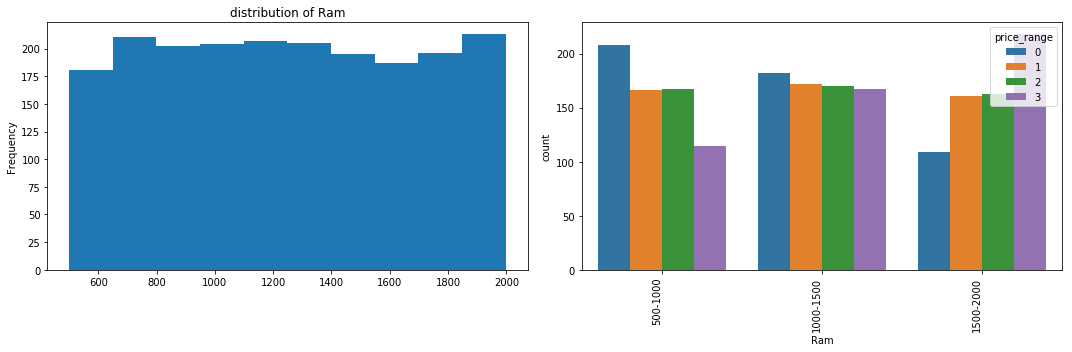

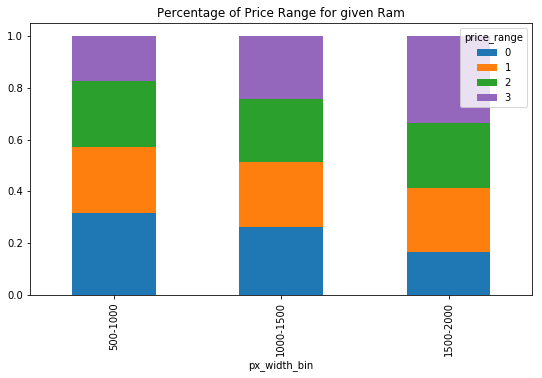

In [0]:
lable = 'px_width'
dist_title = 'distribution of Ram'
X = str(lable+'_bin')
hue = 'price_range'
xlabel = 'Ram'
crosstab_title = 'Percentage of Price Range for given Ram'

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
data[lable].plot('hist', title = dist_title)

bins = [500, 1000, 1500, 2000]
labels = ['500-1000','1000-1500','1500-2000']
data[X] = pd.cut(data[lable], bins=bins, labels=labels)


plt.subplot(1,2,2)
sns.countplot(x = X, hue = hue, data = data,palette=["C0", "C1", "C2", "C4"])
plt.xlabel(xlabel)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
pd.crosstab(data[X],data[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5),color=["C0", "C1", "C2", "C4"],
                                                     title = crosstab_title)
plt.show()

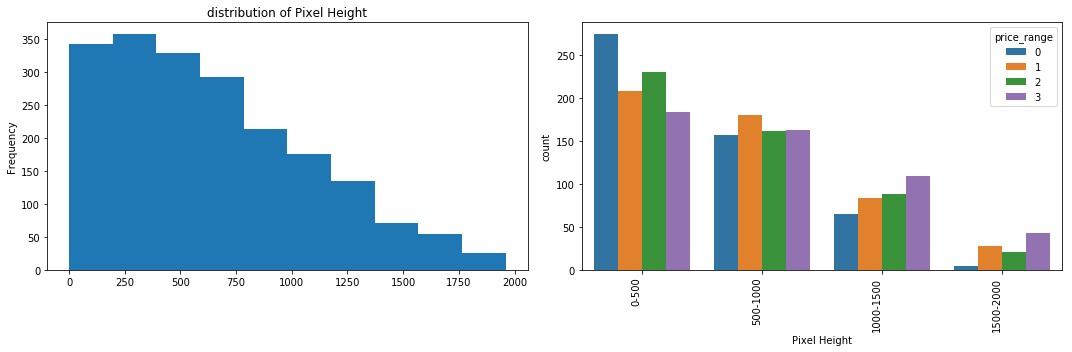

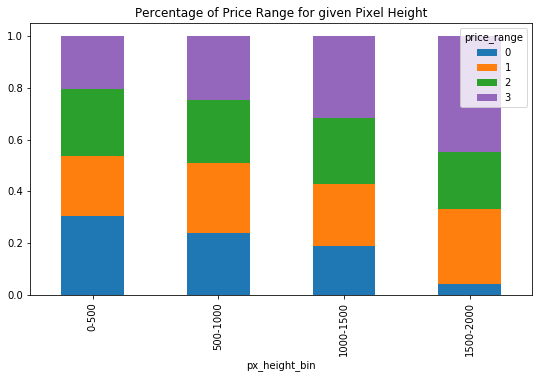

In [0]:
lable = 'px_height'
dist_title = 'distribution of Pixel Height'
X = str(lable+'_bin')
hue = 'price_range'
xlabel = 'Pixel Height'
crosstab_title = 'Percentage of Price Range for given Pixel Height'

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
data[lable].plot('hist', title = dist_title)

bins = [0, 500, 1000, 1500, 2000]
labels = ['0-500','500-1000','1000-1500', '1500-2000']
data[X] = pd.cut(data[lable], bins=bins, labels=labels)


plt.subplot(1,2,2)
sns.countplot(x = X, hue = hue, data = data,palette=["C0", "C1", "C2", "C4"])
plt.xlabel(xlabel)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
pd.crosstab(data[X],data[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5),color=["C0", "C1", "C2", "C4"],
                                                     title = crosstab_title)
plt.show()

this seem to help in predicting, not as much as ram but ya closer to battery power

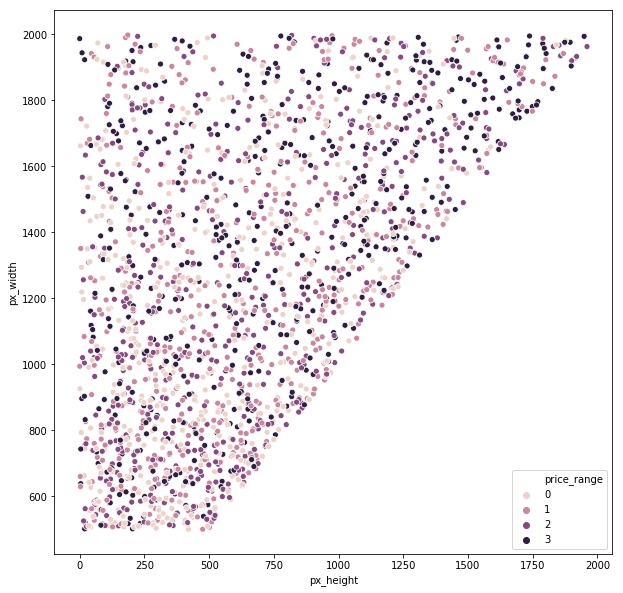

In [0]:
plt.figure( figsize = (10,10))
g = sns.scatterplot(x = 'px_height', y = 'px_width', hue = 'price_range', data = data)

# Data Preparation

In [0]:
y = data.pop('price_range').values
y = np.reshape(y, (-1,1))
X = data.values


In [0]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [0]:
encoder = OneHotEncoder(categories = 'auto')
y = encoder.fit_transform(y).toarray()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Building Neural Network

In [0]:
model = Sequential()
model.add(Dense(16,input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_10 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 52        
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs = 150, batch_size = 64)

Epoch 1/150
1600/1600 [==============================] - 0s 203us/step - loss: 1.3756 - acc: 0.3100
Epoch 2/150
1600/1600 [==============================] - 0s 48us/step - loss: 1.3282 - acc: 0.3725
Epoch 3/150
1600/1600 [==============================] - 0s 47us/step - loss: 1.2818 - acc: 0.4269
Epoch 4/150
1600/1600 [==============================] - 0s 48us/step - loss: 1.2276 - acc: 0.4806
Epoch 5/150
1600/1600 [==============================] - 0s 48us/step - loss: 1.1628 - acc: 0.5300
Epoch 6/150
1600/1600 [==============================] - 0s 50us/step - loss: 1.0875 - acc: 0.5600
Epoch 7/150
1600/1600 [==============================] - 0s 48us/step - loss: 1.0072 - acc: 0.5906
Epoch 8/150
1600/1600 [==============================] - 0s 51us/step - loss: 0.9263 - acc: 0.6269
Epoch 9/150
1600/1600 [==============================] - 0s 51us/step - loss: 0.8477 - acc: 0.6631
Epoch 10/150
1600/1600 [==============================] - 0s 48us/step - loss: 0.7752 - acc: 0.6969
Epoch 11

In [0]:
y_pred = model.predict(X_test)

pred = []
for i in range(len(y_pred)):
  pred.append(np.argmax(y_pred[i]))

test = []
for i in range(len(y_test)):
  test.append(np.argmax(y_test[i]))
  
accuracy_score(test, pred)

0.2025

In [0]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 150, batch_size = 64)

Train on 1600 samples, validate on 400 samples
Epoch 1/150
1600/1600 [==============================] - 0s 241us/step - loss: 1.5516 - acc: 0.2294 - val_loss: 1.5080 - val_acc: 0.1850
Epoch 2/150
1600/1600 [==============================] - 0s 56us/step - loss: 1.4325 - acc: 0.2244 - val_loss: 1.4158 - val_acc: 0.2175
Epoch 3/150
1600/1600 [==============================] - 0s 55us/step - loss: 1.3739 - acc: 0.2594 - val_loss: 1.3651 - val_acc: 0.2650
Epoch 4/150
1600/1600 [==============================] - 0s 53us/step - loss: 1.3341 - acc: 0.3212 - val_loss: 1.3221 - val_acc: 0.3400
Epoch 5/150
1600/1600 [==============================] - 0s 52us/step - loss: 1.2965 - acc: 0.3819 - val_loss: 1.2746 - val_acc: 0.4425
Epoch 6/150
1600/1600 [==============================] - 0s 53us/step - loss: 1.2535 - acc: 0.4325 - val_loss: 1.2187 - val_acc: 0.4975
Epoch 7/150
1600/1600 [==============================] - 0s 55us/step - loss: 1.2028 - acc: 0.4725 - val_loss: 1.1554 - val_acc: 0.5400


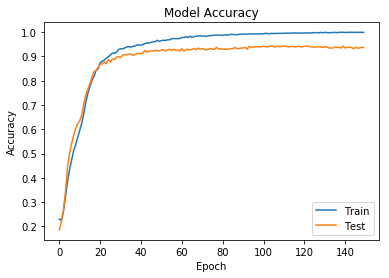

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

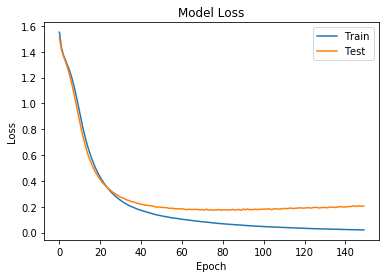

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

**Second Model with Dropout**

In [0]:
model1 = Sequential()
model1.add(Dense(16,input_dim = X_train.shape[1], activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(Dense(12, activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(Dense(4, activation = 'softmax'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                336       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 12)                204       
_________________________________________________________________
dropout_8 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 52        
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


In [0]:
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history1 = model1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 250, batch_size = 64)

Train on 1600 samples, validate on 400 samples
Epoch 1/250
1600/1600 [==============================] - 1s 410us/step - loss: 1.6634 - acc: 0.2619 - val_loss: 1.4974 - val_acc: 0.2800
Epoch 2/250
1600/1600 [==============================] - 0s 63us/step - loss: 1.5031 - acc: 0.2925 - val_loss: 1.4266 - val_acc: 0.3100
Epoch 3/250
1600/1600 [==============================] - 0s 66us/step - loss: 1.4333 - acc: 0.3075 - val_loss: 1.3917 - val_acc: 0.3375
Epoch 4/250
1600/1600 [==============================] - 0s 57us/step - loss: 1.4033 - acc: 0.3200 - val_loss: 1.3646 - val_acc: 0.3450
Epoch 5/250
1600/1600 [==============================] - 0s 62us/step - loss: 1.3636 - acc: 0.3406 - val_loss: 1.3404 - val_acc: 0.3700
Epoch 6/250
1600/1600 [==============================] - 0s 60us/step - loss: 1.3453 - acc: 0.3444 - val_loss: 1.3137 - val_acc: 0.4175
Epoch 7/250
1600/1600 [==============================] - 0s 58us/step - loss: 1.3061 - acc: 0.3706 - val_loss: 1.2825 - val_acc: 0.4450


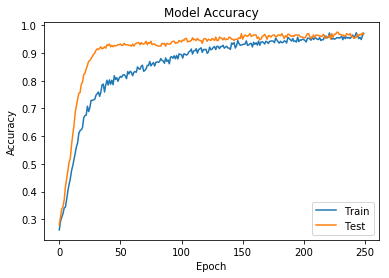

In [0]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

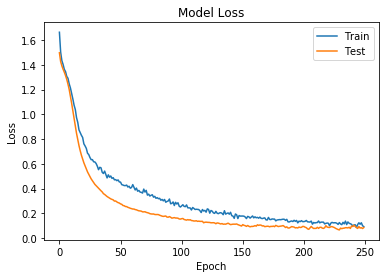

In [0]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [0]:
y_pred = model1.predict(X_test)

pred = []
for i in range(len(y_pred)):
  pred.append(np.argmax(y_pred[i]))

test = []
for i in range(len(y_test)):
  test.append(np.argmax(y_test[i]))
  
accuracy_score(test, pred)

0.9675

In [0]:
! pip install eli5

In [0]:
from eli5.sklearn import PermutationImportance

In [0]:
def basic_model():
  model1 = Sequential()
  model1.add(Dense(16,input_dim = X_train.shape[1], activation = 'relu'))
  model1.add(Dropout(0.2))
  model1.add(Dense(12, activation = 'relu'))
  model1.add(Dropout(0.2))
  model1.add(Dense(4, activation = 'softmax'))
  model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model1

model = KerasClassifier(build_fn = basic_model, epochs = 150, batch_size = 50, verbose = 2,validation_data = (X_test, y_test))
model.fit(X_train, y_train)

Train on 1600 samples, validate on 400 samples
Epoch 1/150
 - 1s - loss: 1.5381 - acc: 0.2669 - val_loss: 1.4301 - val_acc: 0.2900
Epoch 2/150
 - 0s - loss: 1.4614 - acc: 0.2794 - val_loss: 1.3768 - val_acc: 0.3300
Epoch 3/150
 - 0s - loss: 1.4105 - acc: 0.2963 - val_loss: 1.3402 - val_acc: 0.3550
Epoch 4/150
 - 0s - loss: 1.3708 - acc: 0.3375 - val_loss: 1.3083 - val_acc: 0.4000
Epoch 5/150
 - 0s - loss: 1.3391 - acc: 0.3219 - val_loss: 1.2717 - val_acc: 0.4325
Epoch 6/150
 - 0s - loss: 1.3134 - acc: 0.3550 - val_loss: 1.2266 - val_acc: 0.4625
Epoch 7/150
 - 0s - loss: 1.2643 - acc: 0.3938 - val_loss: 1.1724 - val_acc: 0.4975
Epoch 8/150
 - 0s - loss: 1.2127 - acc: 0.4144 - val_loss: 1.1125 - val_acc: 0.5500
Epoch 9/150
 - 0s - loss: 1.1633 - acc: 0.4525 - val_loss: 1.0429 - val_acc: 0.5825
Epoch 10/150
 - 0s - loss: 1.1059 - acc: 0.4819 - val_loss: 0.9676 - val_acc: 0.6225
Epoch 11/150
 - 0s - loss: 1.0532 - acc: 0.5000 - val_loss: 0.8988 - val_acc: 0.6650
Epoch 12/150
 - 0s - loss: 

In [0]:
perm = PermutationImportance(model, random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = data.columns.tolist())

Weight,Feature
0.7055 ± 0.0218,ram
0.2275 ± 0.0187,battery_power
0.1186 ± 0.0060,px_height
0.1186 ± 0.0119,px_width
0.0249 ± 0.0059,mobile_wt
0.0122 ± 0.0037,int_memory
0.0092 ± 0.0016,three_g
0.0084 ± 0.0023,wifi
0.0067 ± 0.0027,four_g
0.0057 ± 0.0022,n_cores


In [0]:
# So Ram, Battery_Power, Px_height, Px_width most affected prediction